In [2]:
%pip install colorstreak

In [3]:
from colorstreak import Logger as log
from matplotlib import pyplot as plt

import numpy as np

In [14]:


"""
Para los mínimos cuadrados ordinarios (MCO), se busca estimar los parámetros de un modelo lineal
Beta_1
formula = sum( (x_i - x_media) * (y_i - y) ) / sum( (x_i - x_media)**2 )

Beta_0
fomula = y_media - Beta_1 * x_media

"""

def betas(x, y):
    x_media = np.mean(x)
    y_media = np.mean(y)

    numerador = np.sum( (x - x_media) * (y - y_media) )
    denominador = np.sum( (x - x_media)**2 )

    beta_1 = numerador / denominador
    beta_0 = y_media - beta_1 * x_media

    return beta_0, beta_1

def prediccion(x, beta_0, beta_1):
    y_pred = beta_0 + beta_1 * x
    return y_pred


def error(x, y, beta_0, beta_1):
    y_pred = prediccion(x, beta_0, beta_1)
    residuals = y - y_pred
    mse = np.mean(residuals**2)
    return mse


def ecuacion_recta(beta_0, beta_1):
    return f"y = {beta_0:.2f} + {beta_1:.2f} * x"



def mensaje_pendiente(beta_1: float):
    match beta_1:
        case val if val > 0:
            log.info("La pendiente es positiva: hay una relación directa")
        case val if val < 0:
            log.info("La pendiente es negativa: hay una relación inversa")
        case _:
            log.info("La pendiente es cero: no hay relación lineal")
            



petroleo_x = np.array([45, 55, 65, 75, 85])
inflacion_y = np.array([3.1, 3.6, 4.0, 4.6, 5.1])




beta_0, beta_1 = betas(petroleo_x, inflacion_y)
mse = error(petroleo_x, inflacion_y, beta_0, beta_1)
recta_pred = ecuacion_recta(beta_0, beta_1)

log.info(f"Beta 0: {beta_0:.2f}, Beta 1: {beta_1:.2f}")
log.info(f"Mean Squared Error: {mse:.4f}")
log.info(f"Ecuación de la recta: {recta_pred}")

mensaje_pendiente(beta_1)

mensaje_interpretacion = """
Por cada punto que sube el precio del petróleo la inflación sube, 
y es normal por que ante mayor interes obvio menor inversión
"""
log.note(mensaje_interpretacion)
x = 0
inflacion = beta_0 + beta_1 * x
log.metric(f"El valor para cuando x={x} la inflacion es: {inflacion:.2f}")
x_last = petroleo_x[-1]
prediccion_val = prediccion(x_last, beta_0, beta_1)
y_last = inflacion_y[-1]
error_val = y_last - prediccion_val
log.info(f"Para X={x_last}: Real={y_last}, Predicho={prediccion_val:.2f}, Residuo={error_val:.2f}")
mensaje = "Nuestro modelo de predicción es bueno" if abs(error_val) < 0.5 else "Nuestro modelo de predicción es malo"
log.success(mensaje)



[INFO] Beta 0: 0.83, Beta 1: 0.05
[INFO] Mean Squared Error: 0.0016
[INFO] Ecuación de la recta: y = 0.83 + 0.05 * x
[INFO] La pendiente es positiva: hay una relación directa
[NOTE] 
Por cada punto que sube el precio del petróleo la inflación sube, 
y es normal por que ante mayor interes obvio menor inversión

[METRIC] El valor para cuando x=0 la inflacion es: 0.83
[INFO] Para X=85: Real=5.1, Predicho=5.08, Residuo=0.02
[SUCCESS] Nuestro modelo de predicción es bueno


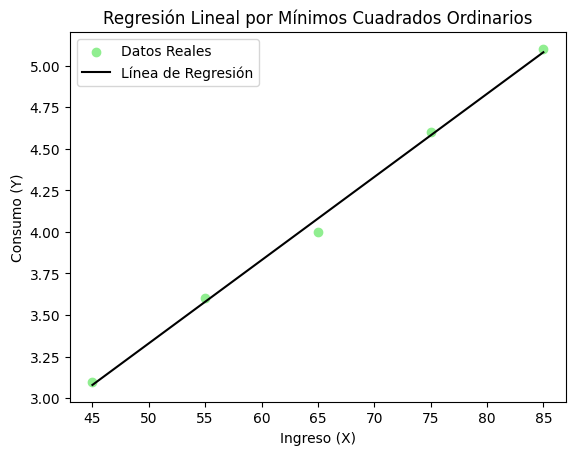

In [5]:
plt.scatter(petroleo_x, inflacion_y, color='lightgreen', label='Datos Reales')
plt.plot(petroleo_x, beta_0 + beta_1 * petroleo_x, color='black', label='Línea de Regresión')
plt.xlabel('Ingreso (X)')
plt.ylabel('Consumo (Y)')
plt.title('Regresión Lineal por Mínimos Cuadrados Ordinarios')
plt.legend()
plt.show()